In [1]:
import numpy as np
import hmvec as hm
import matplotlib.pyplot as plt
import matplotlib

In [2]:
#Plot settings
%matplotlib inline
matplotlib.rcParams['axes.labelsize'] = 'xx-large'
matplotlib.rcParams['xtick.labelsize'] = 'x-large'
matplotlib.rcParams['ytick.labelsize'] = 'x-large'
matplotlib.rcParams['legend.fontsize'] = 'x-large'
matplotlib.rcParams['axes.titlesize'] = 'xx-large'

## Setting Up

First, we setup our grid and initialize our halo model. Since this on a shared node on Cori, the (z,m,k) grid we set up is fairly coarse.

In [12]:
#Setup Grid
Nz = 200                                 # num of redshifts
Nm = 200                                 # num of masses
Nk = 1000                                # num of wavenumbers
redshifts = np.linspace(0.01, 10, Nz)             
masses = np.geomspace(1.0e6, 1.0e15, Nm)          
ks = np.geomspace(1.0e-3, 100.0, Nk)              # wavenumbers
ells = np.linspace(10, 2000, 200)

In [3]:
#Initialize Halo Model 
hcos = hm.HaloModel(redshifts, ks, ms=masses)

Next, set up the parameters for the CIB model we want. We'll be using Planck 2013 values. We can also give different parameter values (e.g. a dictionary of new values for some/all of the parameters); see 'set_cibParams' documentation for details.

In [4]:
#Set CIB Parameters
hcos.set_cibParams('planck13')

## Frequencies

We need to create a 2x2 array of frequencies. The first axis contains the frequencies to be auto/cross-correlated. The second axis contains the endpoints of a range of frequencies (as in a bandpass).

If you can provide a 1D array containing a single frequency/bandpass, it will assume you want an autocorrelation.

In [5]:
#Autocorrelation: 1 Freq
autofreq = np.array([545], dtype=np.double)           #Ghz

#Autocorrelation: Bandpass
autoband = np.array([540, 550], dtype=np.double)           #Ghz

#Cross-Correlation: 1 Freq
crossfreq = np.array([[545],[353]], dtype=np.double)   #Ghz

#Cross-Correlation: Bandpass
crossband = np.array([[540, 550],[347, 359]], dtype=np.double)   #Ghz

Let's just stick with a single frequency autocorrelation for now.

## Calculations

In [ ]:
#Get 3D Power Spectra P(z,k)
Pjj_tot = hcos.get_power("cib", "cib", nu_obs=autofreq)  
Pjj_1h = hcos.get_power_1halo("cib", "cib", nu_obs=autofreq)  
Pjj_2h = hcos.get_power_2halo("cib", "cib", nu_obs=autofreq)  
Pjj_cen = hcos.get_power("cib", "cib", nu_obs=autofreq, subhalos=False)  # no satellites

In [13]:
#Limber Integrals
C_tot, dcdz_tot = hcos.C_ii(ells, redshifts, ks, Pjj_tot, dcdzflag=True)
C_1h, dcdz_1h = hcos.C_ii(ells, redshifts, ks, Pjj_1h, dcdzflag=True)
C_2h, dcdz_2h = hcos.C_ii(ells, redshifts, ks, Pjj_2h, dcdzflag=True)
C_cen, dcdz_cen = hcos.C_ii(ells, redshifts, ks, Pjj_cen, dcdzflag=True)

## Plots

Let's first look at the $C$'s with the centrals and the satellites.

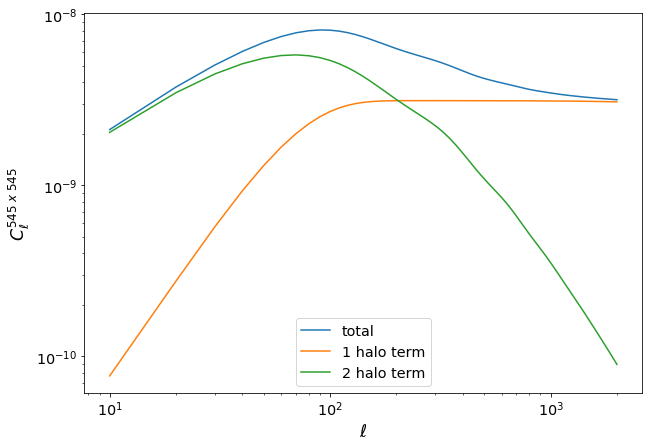

In [17]:
plt.figure(figsize=(10,7))

#Plot C's
plt.loglog(ells, C_tot, label='total')
plt.loglog(ells, C_1h, label='1 halo term')
plt.loglog(ells, C_2h, label='2 halo term')

#Gravy
plt.xlabel(r'$\ell$')
plt.ylabel(rf'$C^{{ {autofreq[0]:0.0f} \;x\; {autofreq[0]:0.0f} }}_\ell$')
plt.legend();

Now let's see the total $C$ without any satellites. Note the difference in the magnitude of the power with and without the satellites. The units are not established yet.

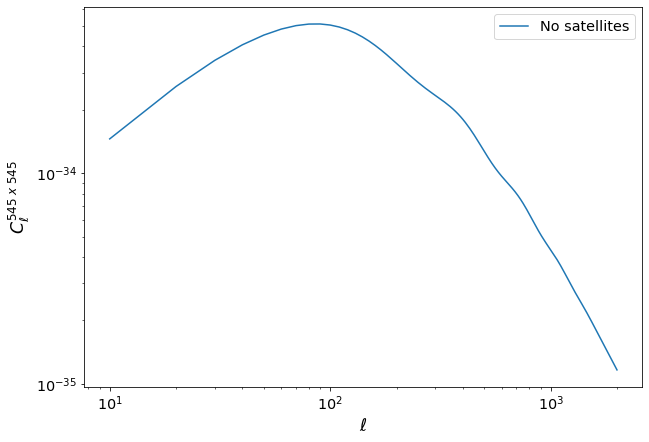

In [18]:
plt.figure(figsize=(10, 7))

#Plot C without Satellites
plt.loglog(ells, C_cen)

#Gravy
plt.xlabel(r'$\ell$')
plt.ylabel(rf'$C^{{ {autofreq[0]:0.0f} \;x\; {autofreq[0]:0.0f} }}_\ell$');

Now let's look at $dC/dz$ with the satellites.

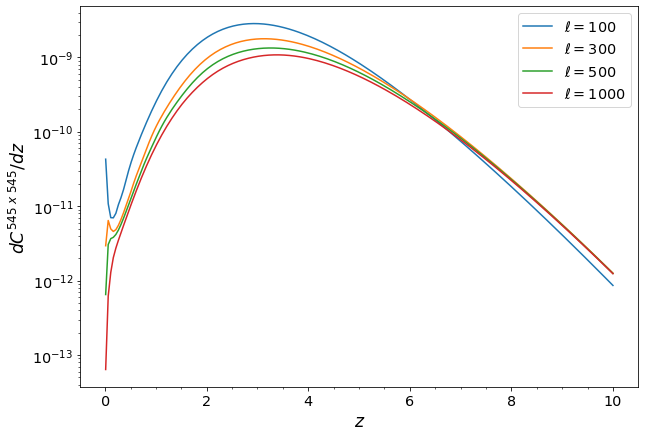

In [40]:
#Plot dC/dz With Satellites
test_ells = np.array([100, 300, 500, 1000])
plt.figure(figsize=(10,7))
for ell in test_ells:
    #Get index
    i = np.where(abs(ell - ells) <= 1)[0][0]

    #Spectra
    plt.semilogy(redshifts, dcdz_tot[:, i], label=rf"$\ell = {ells[i]:0.0f}$")

    #Gravy
    plt.xlabel(r'$z$')
    plt.ylabel(rf'$dC^{{ {autofreq[0]:0.0f} \;x\; {autofreq[0]:0.0f} }} / dz$')
    plt.legend()
    plt.minorticks_on();

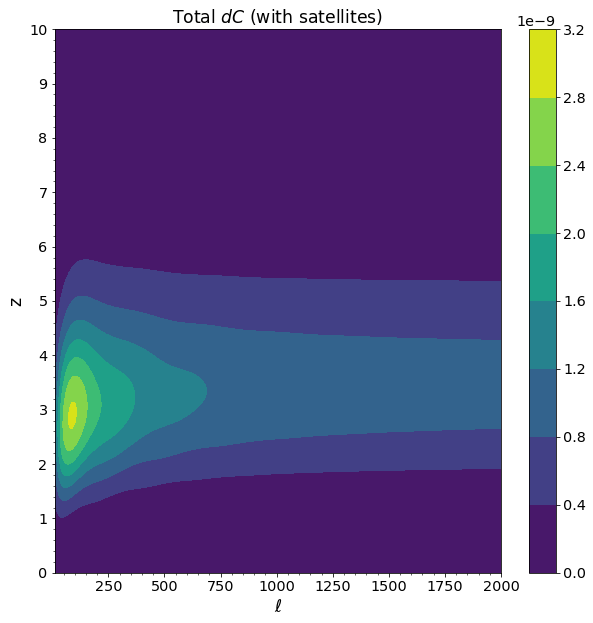

In [55]:
#Setup
plt.figure(figsize=(10,10))

#Plots
plt.contourf(ells, redshifts, dcdz_tot)

#Gravy
plt.colorbar()
plt.xlabel(r'$\ell$')
plt.ylabel('z')
plt.title(r'Total $dC$ (with satellites)')

#Ticks
ax = plt.gca()
ax.set_yticks(np.arange(0,11))
plt.minorticks_on();

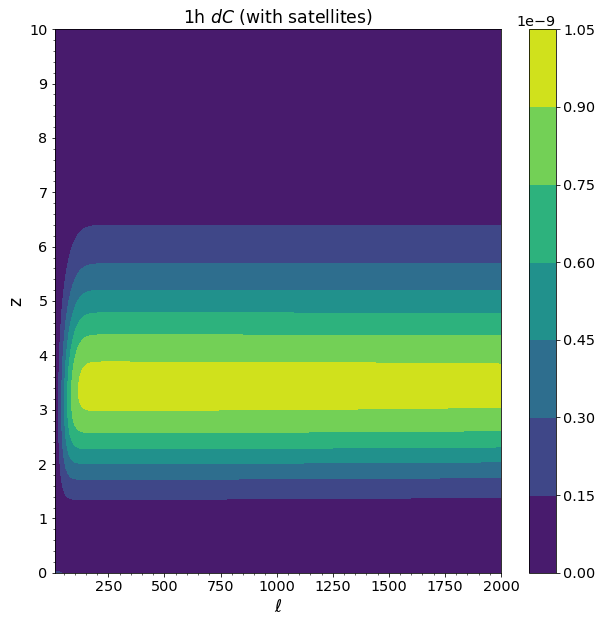

In [56]:
#Setup
plt.figure(figsize=(10,10))

#Plots
plt.contourf(ells, redshifts, dcdz_1h)

#Gravy
plt.colorbar()
plt.xlabel(r'$\ell$')
plt.ylabel('z')
plt.title(r'1h $dC$ (with satellites)')

#Ticks
ax = plt.gca()
ax.set_yticks(np.arange(0,11))
plt.minorticks_on();

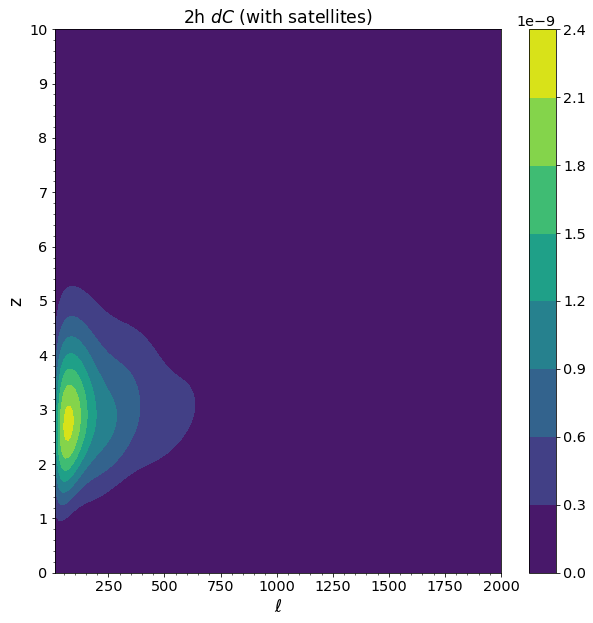

In [57]:
#Setup
plt.figure(figsize=(10,10))

#Plots
plt.contourf(ells, redshifts, dcdz_2h)

#Gravy
plt.colorbar()
plt.xlabel(r'$\ell$')
plt.ylabel('z')
plt.title(r'2h $dC$ (with satellites)')

#Ticks
ax = plt.gca()
ax.set_yticks(np.arange(0,11))
plt.minorticks_on();

And $dC/dz$ without the satellites.

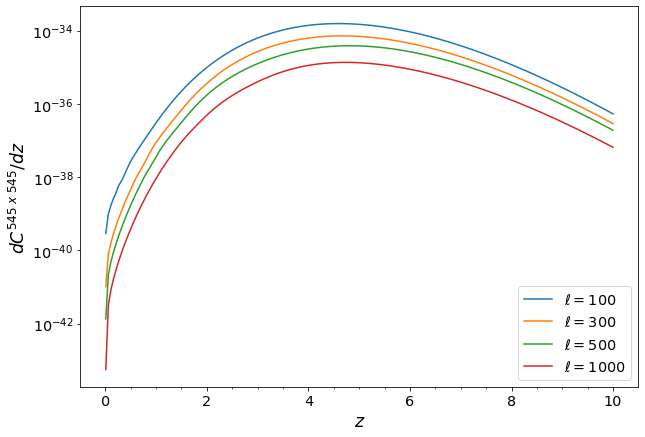

In [43]:
#Plot dC/dz With Satellites
test_ells = np.array([100, 300, 500, 1000])
plt.figure(figsize=(10,7))
for ell in test_ells:
    #Get index
    i = np.where(abs(ell - ells) <= 1)[0][0]

    #Spectra
    plt.semilogy(redshifts, dcdz_cen[:, i], label=rf"$\ell = {ells[i]:0.0f}$")

    #Gravy
    plt.xlabel(r'$z$')
    plt.ylabel(rf'$dC^{{ {autofreq[0]:0.0f} \;x\; {autofreq[0]:0.0f} }} / dz$')
    plt.legend()
    plt.minorticks_on();